<a href="https://colab.research.google.com/github/AsafEl94/Asaf-The--Project-Guy/blob/main/Copy_of_Pandas_Project_Crash_Reporting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv("/content/drive/MyDrive/Data analytics/Crash_Reporting_-_Drivers_Data.csv")
data

<ipython-input-8-c07bf5f4c906>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Data analytics/Crash_Reporting_-_Drivers_Data.csv")


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,NaN,NaN,PARKING LOT,...,15,No,No,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,DAIRYMAID DR,County,METZ DR,NaN,...,35,No,No,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,09/08/2021 12:30:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,...,0,No,No,2010,TOYOTA,SUV,UNKNOWN,39.020303,-77.011436,"(39.02030267, -77.01143583)"
3,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
4,MCP2641001J,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156461,MCP2612004Y,220038128,Montgomery County Police,Injury Crash,09/02/2022 07:15:00 PM,Maryland (State),GEORGIA AVE,County,HEWITT AVE,NaN,...,35,No,No,2009,NISSAN,VERSA,UNKNOWN,39.077211,-77.070443,"(39.07721119, -77.07044252)"
156462,MCP32790021,230011209,Montgomery County Police,Injury Crash,03/07/2023 03:24:00 PM,Maryland (State),VEIRS MILL RD,County,GAIL ST,NaN,...,35,No,No,2018,TOYOTA,RAV4,UNKNOWN,39.049570,-77.071015,"(39.0495696, -77.07101479)"
156463,MCP3226003P,230011811,Montgomery County Police,Property Damage Crash,03/10/2023 04:01:00 PM,County,RANDOLPH RD,County,LOCKSLEY LA,NaN,...,40,No,No,2022,TOYT,UT,NO MISUSE,39.071672,-77.011520,"(39.0716715, -77.01152)"
156464,MCP31210058,230010598,Montgomery County Police,Property Damage Crash,03/03/2023 05:00:00 PM,County,WATKINS MILL RD,County,CRESTED IRIS DR,NaN,...,35,No,No,2009,HONDAT,FIT,NO MISUSE,39.180151,-77.209954,"(39.18015058, -77.2099544)"


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156466 entries, 0 to 156465
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   156466 non-null  object 
 1   Local Case Number               156466 non-null  object 
 2   Agency Name                     156466 non-null  object 
 3   ACRS Report Type                156466 non-null  object 
 4   Crash Date/Time                 156466 non-null  object 
 5   Route Type                      141148 non-null  object 
 6   Road Name                       141983 non-null  object 
 7   Cross-Street Type               141124 non-null  object 
 8   Cross-Street Name               141977 non-null  object 
 9   Off-Road Description            14481 non-null   object 
 10  Municipality                    17384 non-null   object 
 11  Related Non-Motorist            4918 non-null    object 
 12  Collision Type  

In [10]:
def preprocess(data):

  df = data.copy()
  df["Crash Date/Time"] = pd.to_datetime(df["Crash Date/Time"]) # change col to time series 
  df = df.set_index("Crash Date/Time") # set Date col as index 
  df = df.sort_index()
  df = df[df.isna().sum(axis=1)<=10]  # drop rows with 10 na or more

  # columns clanening 
  columns  = ["Agency Name", "ACRS Report Type", "Route Type", "Collision Type", "Weather","Surface Condition",
           "Light", "Traffic Control","Driver Substance Abuse","Driver At Fault","Injury Severity","Vehicle Damage Extent",
            "Vehicle First Impact Location","Vehicle Body Type","Vehicle Movement","Speed Limit","Vehicle Year" , "Vehicle Make","Vehicle Model","Location"]

  df = df[columns] 
  return df

 
  

In [11]:
df = preprocess(data)
df

,Agency Name,ACRS Report Type,Route Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Injury Severity,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Body Type,Vehicle Movement,Speed Limit,Vehicle Year,Vehicle Make,Vehicle Model,Location
Crash Date/Time,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:30:00,Montgomery County Police,Property Damage Crash,Maryland (State),SAME DIR REAR END,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NaN,No,NO APPARENT INJURY,FUNCTIONAL,SIX OCLOCK,PASSENGER CAR,STOPPED IN TRAFFIC LANE,35,1993,BUICK,4S,"(39.02200107, -77.10267305)"
2015-01-01 00:30:00,Montgomery County Police,Property Damage Crash,Maryland (State),SAME DIR REAR END,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,ALCOHOL CONTRIBUTED,Yes,NO APPARENT INJURY,FUNCTIONAL,TWELVE OCLOCK,(SPORT) UTILITY VEHICLE,SLOWING OR STOPPING,35,2008,RANGE ROVER,HSC,"(39.02200107, -77.10267305)"
2015-01-01 01:10:00,Montgomery County Police,Property Damage Crash,Ramp,SAME DIR REAR END,NaN,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,No,NO APPARENT INJURY,FUNCTIONAL,SIX OCLOCK,(SPORT) UTILITY VEHICLE,MAKING LEFT TURN,40,2007,JEEP,COMPASS,"(39.19661, -77.26554667)"
2015-01-01 01:10:00,Montgomery County Police,Property Damage Crash,Ramp,SAME DIR REAR END,NaN,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,ALCOHOL PRESENT,Yes,NO APPARENT INJURY,FUNCTIONAL,TWELVE OCLOCK,PASSENGER CAR,SLOWING OR STOPPING,40,2010,FORD,FOCUS,"(39.19661, -77.26554667)"
2015-01-01 01:14:00,Montgomery County Police,Injury Crash,Maryland (State),HEAD ON,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NaN,No,SUSPECTED MINOR INJURY,DISABLING,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,40,2002,TOYOTA,CAMRY,"(39.09621667, -77.10980333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-15 16:00:00,Montgomery County Police,Injury Crash,County,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NaN,No,POSSIBLE INJURY,DISABLING,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,35,2019,FORD,FUSION,"(39.16932067, -77.282877)"
2023-03-15 21:08:00,Montgomery County Police,Property Damage Crash,Maryland (State),ANGLE MEETS LEFT TURN,CLEAR,DRY,DARK LIGHTS ON,STOP SIGN,NONE DETECTED,No,NO APPARENT INJURY,FUNCTIONAL,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,25,2011,TOYOTA,CAMRY,"(39.0422429, -77.05187467)"
2023-03-15 21:08:00,Montgomery County Police,Property Damage Crash,Maryland (State),ANGLE MEETS LEFT TURN,CLEAR,DRY,DARK LIGHTS ON,STOP SIGN,NONE DETECTED,Yes,NO APPARENT INJURY,DISABLING,NINE OCLOCK,PASSENGER CAR,MAKING LEFT TURN,25,2015,CHEVY,MALIBU,"(39.0422429, -77.05187467)"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 151293 entries, 2015-01-01 00:30:00 to 2023-03-16 00:31:00
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Agency Name                    151293 non-null  object
 1   ACRS Report Type               151293 non-null  object
 2   Route Type                     141086 non-null  object
 3   Collision Type                 150903 non-null  object
 4   Weather                        140153 non-null  object
 5   Surface Condition              138062 non-null  object
 6   Light                          150166 non-null  object
 7   Traffic Control                130910 non-null  object
 8   Driver Substance Abuse         125186 non-null  object
 9   Driver At Fault                151293 non-null  object
 10  Injury Severity                151293 non-null  object
 11  Vehicle Damage Extent          151063 non-null  object
 12  Vehicle Fi

Text(0.5, 1.0, 'Number of Accident By Month')

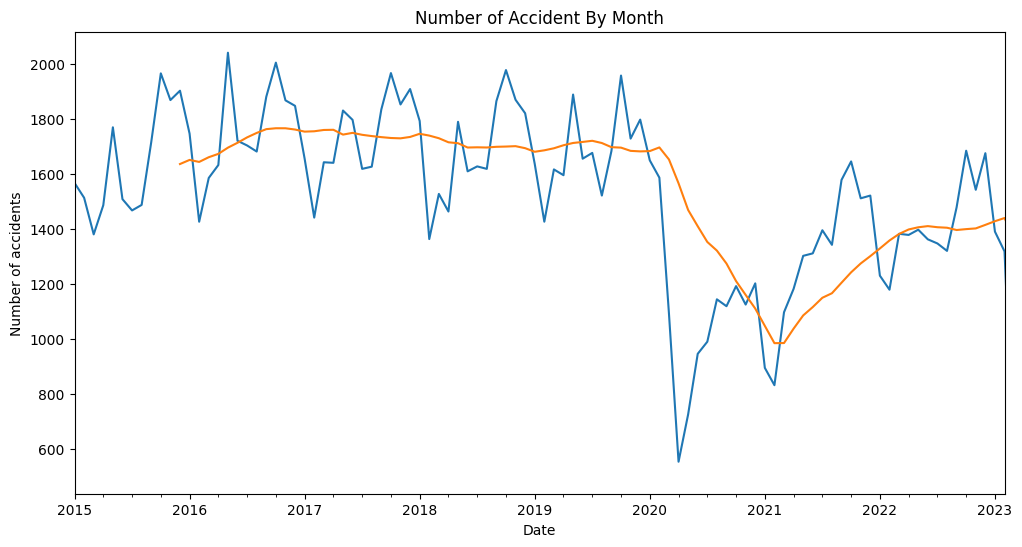

In [13]:
fig, axes = plt.subplots(figsize = (12,6))

ts_mean_by_year = df.resample("1M").size().rolling(12).mean()
ts = df.resample("1M").size()
ts.plot(axes=axes)
ts_mean_by_year.plot(axes=axes)
axes.set_xlim("2015-01","2023-02")
axes.set_xlabel('Date')
axes.set_ylabel('Number of accidents')
axes.set_title('Number of Accident By Month')


The plot of car crashes between the years 2015 to 2021 shows a random distribution of the number of accidents **by month** between the years 2015-2019, with no clear trend or pattern. However, the COVID-19 pandemic had a significant impact on the number of car crashes, with a steep decline in accidents during the lockdown periods. This can be attributed to reduced traffic on the roads and increased awareness of road safety among drivers. However, as restrictions ease and life returns to normal, the number of car crashes has started to pick up again.

Text(0.5, 1.0, 'Normalized ACRS')

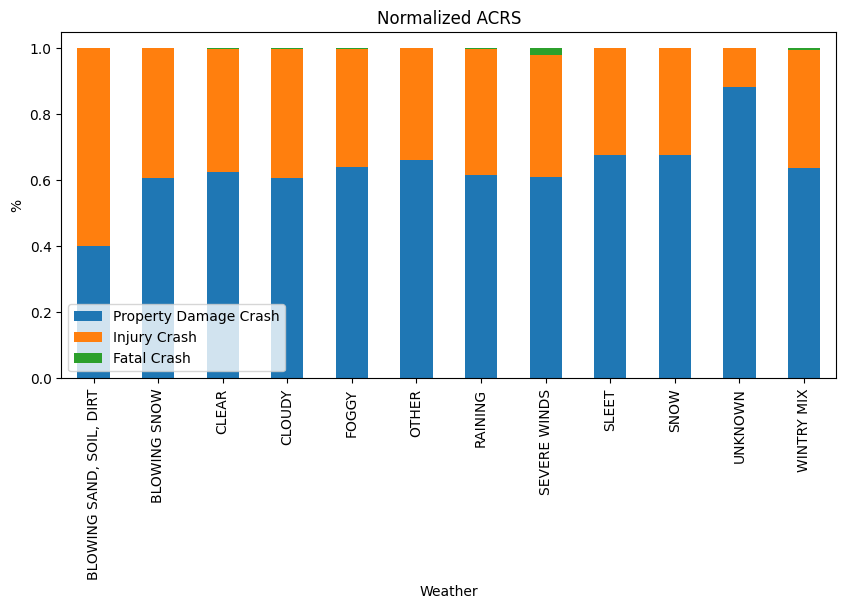

In [14]:
weather_norm = df.groupby("Weather")["ACRS Report Type"].value_counts(normalize=True).unstack().fillna(0)
cols = ["Property Damage Crash","Injury Crash","Fatal Crash"]
weather_norm = weather_norm[cols]
weather_norm

fig, ax = plt.subplots(figsize = (10, 4.5))
weather_norm.plot.bar(stacked=True,ax=ax).legend(loc='best')
ax.set_xlabel('Weather')
ax.set_ylabel('%')
ax.set_title('Normalized ACRS')

The above VIZ shows the correlation of bad weather cause accidents to be more dangerouse, as people may intuitively grasp isn't backed with data (in Maryland case-study). We can see almost complete homogency between all types of weather (excluding "Unknown" and "Blowing Sand").

In [19]:
surface_norm = df.groupby("ACRS Report Type")["Surface Condition"].value_counts(normalize=True).unstack().fillna(0)
cols = ["OIL","ICE","DRY", "WET", "SLUSH", "SNOW", "MUD, DIRT, GRAVEL"]
surface_norm = surface_norm[cols]
surface_norm

Surface Condition,OIL,ICE,DRY,WET,SLUSH,SNOW,"MUD, DIRT, GRAVEL"
ACRS Report Type,,,,,,,
Fatal Crash,0.000000,0.005277,0.854881,0.124011,0.010554,0.000000,0.000000
Injury Crash,0.000188,0.006455,0.792348,0.191383,0.001351,0.005723,0.000338
Property Damage Crash,0.000178,0.008129,0.787373,0.188691,0.001457,0.007477,0.000320


array([<Axes: ylabel='OIL'>, <Axes: ylabel='ICE'>, <Axes: ylabel='DRY'>,
       <Axes: ylabel='WET'>, <Axes: ylabel='SLUSH'>,
       <Axes: ylabel='SNOW'>, <Axes: ylabel='MUD, DIRT, GRAVEL'>],
      dtype=object)

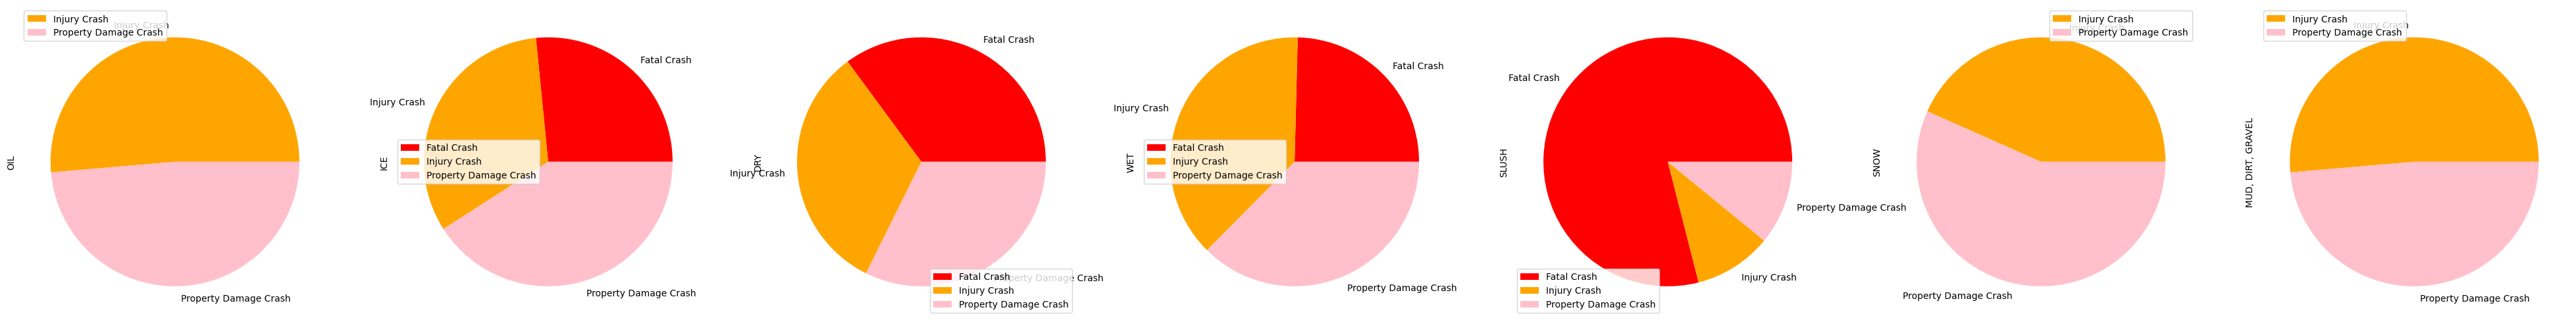

In [35]:
surface_norm.plot.pie(subplots=True, figsize=(50, 50), colors=["red", "orange", "pink"])

Text(0.5, 1.0, 'Number of Accident By Speed Limit')

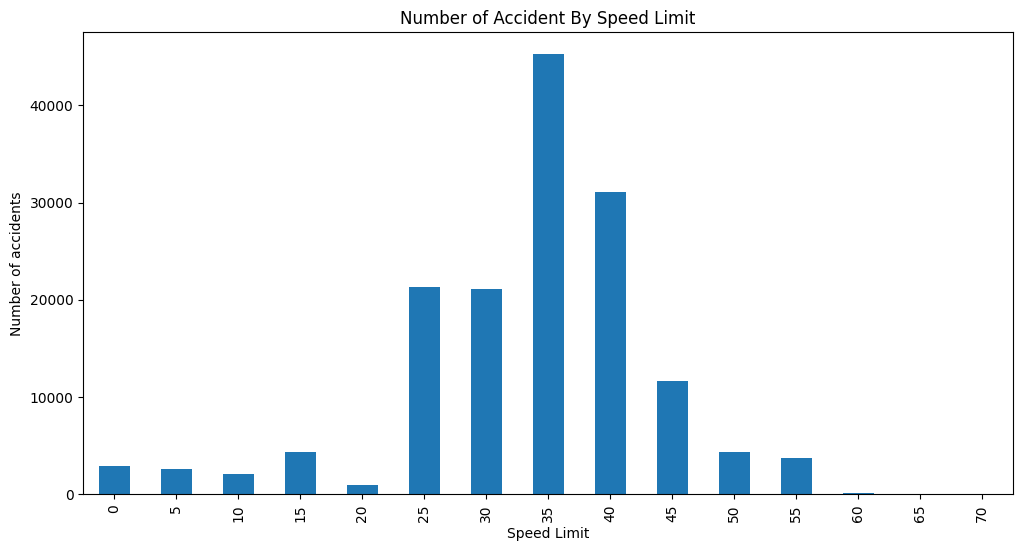

In [ ]:
fig = plt.figure(figsize = (12,6))
ax = fig.gca()

# ax.scatter(x = df["Speed Limit"].value_counts().index, 
#           y= df["Speed Limit"].value_counts())
df["Speed Limit"].value_counts().sort_index().plot.bar(ax=ax)
ax.set_xlabel('Speed Limit')
ax.set_ylabel('Number of accidents')
ax.set_title('Number of Accident By Speed Limit')

A bar plot showing the distribution of car crashes by speed limit is a graph that displays the number of car crashes that occurred at different speed limits. The x-axis of the bar plot shows the speed limits, while the y-axis displays the number of car crashes.

In [ ]:
# inury = df.groupby(["ACRS Report Type","Speed Limit"]).size().unstack().fillna(0)
# # inury.loc["Injury Crash"].plot.bar()
# inury

In [ ]:
inury_norm = df.groupby("Speed Limit")["ACRS Report Type"].value_counts(normalize=True).unstack().fillna(0)
cols = ["Property Damage Crash","Injury Crash","Fatal Crash"]
inury_norm = inury_norm[cols]
inury_norm

ACRS Report Type,Property Damage Crash,Injury Crash,Fatal Crash
Speed Limit,,,
0,0.767704,0.231611,0.000684
5,0.792423,0.207577,0.000000
10,0.789089,0.210911,0.000000
15,0.775454,0.224316,0.000230
20,0.738798,0.261202,0.000000
25,0.696717,0.301829,0.001454
30,0.627552,0.370174,0.002274
35,0.607510,0.390811,0.001679
40,0.569037,0.426850,0.004113


In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
inury_norm.plot.bar(stacked=True,ax=ax)
ax.set_xlabel('Speed Limit')
ax.set_ylabel('%')
ax.set_title('Normalized ACRS')


NameError: ignored

Text(0.5, 1.0, 'Fatal Crash')

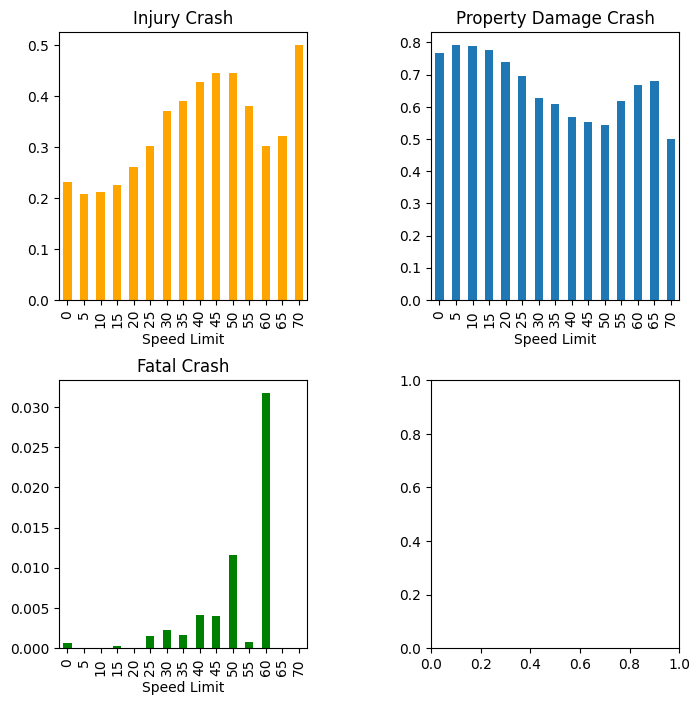

In [ ]:


fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (8,8))

fig.subplots_adjust(hspace=0.3, wspace=0.5)

inury_norm.T.loc["Injury Crash"].plot.bar(ax=axes[0,0],color="orange")
axes[0,0].set_title('Injury Crash')

inury_norm.T.loc["Property Damage Crash"].plot.bar(ax=axes[0,1])
axes[0,1].set_title('Property Damage Crash')

inury_norm.T.loc["Fatal Crash"].plot.bar(ax=axes[1,0],color="g")
axes[1,0].set_title('Fatal Crash')

The graph you have shows the distribution of car crash results by speed limit, normalized to the total number of accidents that occurred at each speed limit. Specifically, the results of the crashes are categorized into three types: Property Damage Crash, Injury Crash, and Fatal Crash.

By normalizing to the total number of accidents at each speed limit, we can see the relative distribution of the different types of crashes at each speed limit.

For example, we may observe that Fatal Crashes are more likely to occur at higher speed limits, such as 60 miles per hour, compared to lower speed limits

In [ ]:
# df.groupby(["ACRS Report Type","Driver Substance Abuse"]).size().unstack().fillna(0)

In [ ]:
def extract_coordinates(coord_string):
    '''  this function speard location(string) to x and y  coordinates '''
    coord_string = coord_string.replace('(', '').replace(')', '')
    
    parts = coord_string.split(',')
    
    return (float(parts[0]), float(parts[1]))


In [ ]:
df[['x', 'y']] = df['Location'].apply(lambda x: pd.Series(extract_coordinates(x))) # creating x,y columns 



In [ ]:
df['period'] =  pd.cut(df.index.hour,
       bins = [0, 6, 12, 21, 24],
       labels = ['night', 'morning', 'day', 'night'],
       include_lowest=True, 
       ordered=False)
# creating "period column which split the day for 3 parts, morinig : 6 to 12, day:12 to 21, night: 21 to 6"

In [ ]:
masking = (df["y"]>df["y"].quantile(q=0.01)) & (df["y"]<df["y"].quantile(q=0.99)) & (df["x"]>df["x"].quantile(q=0.01)) & (df["x"]<df["x"].quantile(q=0.99))
masking.sum()
# this masking removing outliers of x and y coordintes

145523

<Axes: xlabel='x', ylabel='y'>

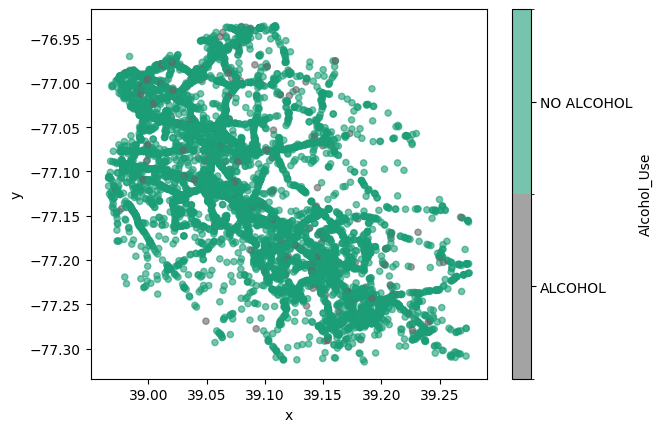

In [ ]:


df["Alcohol_Use"] = np.where((df["Driver Substance Abuse"]=="ALCOHOL PRESENT")|(df["Driver Substance Abuse"]=="ALCOHOL CONTRIBUTED"), "ALCOHOL","NO ALCOHOL")
df["Alcohol_Use"] = df["Alcohol_Use"].astype("category")
df_filtered = df[masking]
df_filtered.sample(10000).plot.scatter(x="x", y="y",c ="Alcohol_Use", cmap = 'Dark2_r', alpha=0.6)

The scatter plot shows the location and frequency of car accidents, with green markers representing accidents without alcohol involvement and red markers representing accidents with alcohol involvement. The plot helps identify patterns in the data and areas where alcohol-related accidents are more likely to occur. It can inform targeted strategies to reduce alcohol-related accidents and improve road safety.Alttough, we didnt recognize any patterns.

In [ ]:

df.groupby(['period',"Alcohol_Use"]).size().unstack()


Alcohol_Use,ALCOHOL,NO ALCOHOL
period,,
day,1890,80344
morning,258,47778
night,2858,18165


In [ ]:
df.groupby('period')["Alcohol_Use"].value_counts(normalize=True).unstack()

,NO ALCOHOL,ALCOHOL
period,,
day,0.977017,0.022983
morning,0.994629,0.005371
night,0.864054,0.135946


<Axes: xlabel='x', ylabel='y'>

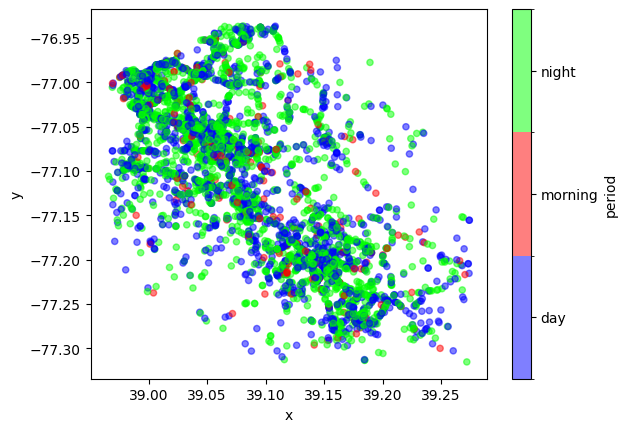

In [ ]:
df["period"] = df["period"].astype("category")
df_filtered[df_filtered["Alcohol_Use"]=="ALCOHOL"].plot.scatter(x="x",y="y",c="period",cmap = "brg", alpha = 0.5)

The scatter plot shows the location and frequency of car accidents with alcohol involvement, split into three categories based on the time of day: morning (red), night (green), and daytime (blue). The plot helps identify patterns in the data and areas where alcohol-related accidents are more likely to occur during different times of the day. The plot shows that the highest number of accidents occur at night.

In [ ]:
df["Light_binary"] = (df["Light"] == "DARK LIGHTS ON").astype(int)

Text(0, 0.5, 'Mean Light Value')

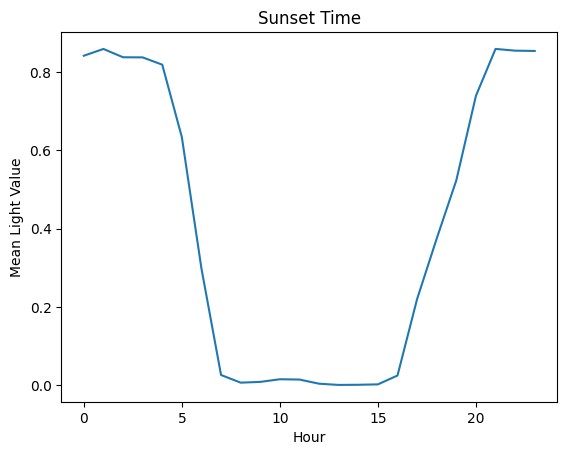

In [ ]:
df.groupby(df.index.hour)["Light_binary"].mean().plot()
plt.title('Sunset Time')
plt.xlabel('Hour')
plt.ylabel('Mean Light Value')

In [ ]:
# df.groupby(df.index.hour)["Light_binary"].mean()

The plot aims to determine the time when the sun sets based on the data provided in the "Light" column. To achieve this, a new column was added with binary numbers 0 and 1 indicating whether the light was on or off. The data was then grouped by an hour, and the mean was plotted to visualize the trend of the light turning on and off during that hour. By examining the graph, one can determine the approximate time of sunset based on when the light consistently turns off.

In [ ]:
# fig, axes = plt.subplot(nrows = 4 , ncol = 3)

df_light = df.groupby([df.index.hour,df.index.month])["Light_binary"].mean().unstack()
df_light

Crash Date/Time,1,2,3,4,5,6,7,8,9,10,11,12
Crash Date/Time,,,,,,,,,,,,
0,0.837838,0.809249,0.860577,0.816176,0.849765,0.846154,0.890710,0.813472,0.802083,0.834254,0.858065,0.877660
1,0.875000,0.897959,0.863309,0.864000,0.832298,0.860870,0.847953,0.776316,0.861314,0.866242,0.890511,0.879121
2,0.818182,0.859060,0.827273,0.784483,0.861314,0.861538,0.870229,0.859813,0.809524,0.864198,0.781513,0.834586
3,0.853659,0.852941,0.812500,0.861789,0.750000,0.842520,0.861538,0.831776,0.881818,0.782051,0.862069,0.865672
4,0.868421,0.793388,0.840000,0.835616,0.823529,0.734694,0.792308,0.846939,0.780220,0.849624,0.791304,0.872549
5,0.787709,0.777174,0.832298,0.707865,0.396648,0.223684,0.419512,0.579618,0.700000,0.691429,0.666667,0.794444
6,0.526178,0.387387,0.320334,0.092527,0.028169,0.004505,0.023622,0.140426,0.287390,0.491803,0.357527,0.456221
7,0.064953,0.017882,0.026646,0.005607,0.003145,0.002151,0.000000,0.000000,0.016282,0.075000,0.022457,0.038462
8,0.011442,0.003448,0.011127,0.007396,0.006477,0.000000,0.002725,0.018519,0.010676,0.005203,0.002242,0.002618


In [ ]:
df_light = df_light.T

In [ ]:
df_light['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_light.set_index('Month', inplace=True)
df_light

Crash Date/Time,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
Jan,0.837838,0.875000,0.818182,0.853659,0.868421,0.787709,0.526178,0.064953,0.011442,0.003947,...,0.000000,0.005769,0.034979,0.591837,0.834813,0.823034,0.893305,0.887850,0.869403,0.900383
Feb,0.809249,0.897959,0.859060,0.852941,0.793388,0.777174,0.387387,0.017882,0.003448,0.002574,...,0.000000,0.000000,0.021665,0.225885,0.783692,0.868878,0.883178,0.890274,0.869416,0.853448
Mar,0.860577,0.863309,0.827273,0.812500,0.840000,0.832298,0.320334,0.026646,0.011127,0.016442,...,0.001339,0.000000,0.000000,0.021792,0.246154,0.637346,0.830709,0.875989,0.862620,0.796610
Apr,0.816176,0.864000,0.784483,0.861789,0.835616,0.707865,0.092527,0.005607,0.007396,0.003484,...,0.003003,0.000000,0.000000,0.006637,0.014417,0.223844,0.789357,0.875622,0.874552,0.860697
May,0.849765,0.832298,0.861314,0.750000,0.823529,0.396648,0.028169,0.003145,0.006477,0.003096,...,0.000000,0.000000,0.000000,0.003964,0.007246,0.050086,0.550827,0.822811,0.844985,0.838983
Jun,0.846154,0.860870,0.861538,0.842520,0.734694,0.223684,0.004505,0.002151,0.000000,0.008460,...,0.003995,0.000000,0.000000,0.000000,0.004614,0.003656,0.241573,0.809045,0.837278,0.885417
Jul,0.890710,0.847953,0.870229,0.861538,0.792308,0.419512,0.023622,0.000000,0.002725,0.013081,...,0.000000,0.000000,0.000000,0.002030,0.001244,0.020367,0.426593,0.819742,0.852332,0.890977
Aug,0.813472,0.776316,0.859813,0.831776,0.846939,0.579618,0.140426,0.000000,0.018519,0.020374,...,0.001267,0.002389,0.000000,0.000000,0.009490,0.090136,0.686192,0.813239,0.845679,0.883408
Sep,0.802083,0.861314,0.809524,0.881818,0.780220,0.700000,0.287390,0.016282,0.010676,0.010610,...,0.000000,0.001862,0.001803,0.000959,0.044329,0.521127,0.822430,0.872768,0.875000,0.829960


Text(0, 0.5, 'Month')

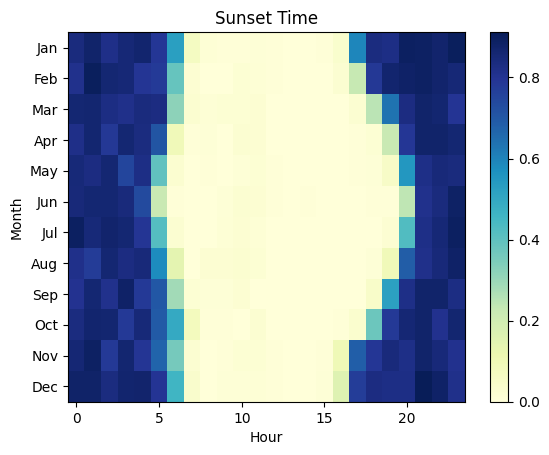

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(df_light, cmap='YlGnBu', aspect='auto')

# Set the y-axis ticks and tick labels
ax.set_yticks(range(len(df_light.index)))
ax.set_yticklabels(df_light.index)

plt.colorbar(im)
plt.title('Sunset Time')
plt.xlabel('Hour')
plt.ylabel('Month')

This heat map that shows the mean value of the binary "lights" for each hour and month, with darker colors indicating a higher value and lighter colors indicating a lower value. By examining the heatmap, you can determine when the sun goes down in each month and when the switching between winter and summer clock occurs.

In [ ]:
df_light1 = df_light.stack().reset_index()
df_light1.columns = ['Month', 'Hour', 'Light']

In [ ]:
df_light1

,Month,Hour,Light
0,Jan,0,0.837838
1,Jan,1,0.875000
2,Jan,2,0.818182
3,Jan,3,0.853659
4,Jan,4,0.868421
...,...,...,...
283,Dec,19,0.825503
284,Dec,20,0.823913
285,Dec,21,0.911917
286,Dec,22,0.882166


Text(0, 0.5, 'Light Value')

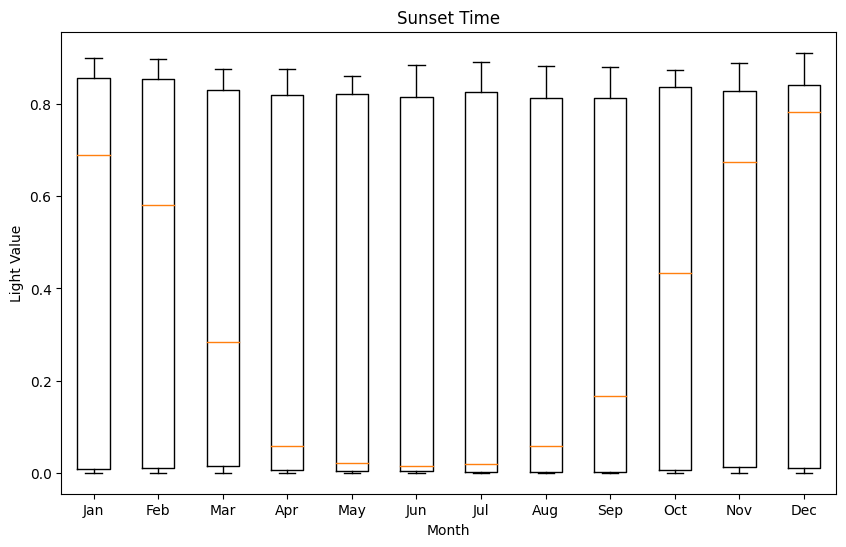

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot([df_light1[df_light1['Month'] == m]['Light'] for m in df_light1['Month'].unique()])
plt.xticks(range(1,13), df_light1['Month'].unique())
plt.title('Sunset Time')
plt.xlabel('Month')
plt.ylabel('Light Value')


In [ ]:
# x=[df_light[df_light['Month'] == m]['Light'] for m in df_light['Month'].unique()]
# x

This box plot shows the distribution of the binary "lights" for each month. By examining the plot, you can determine the range of the sunset times throughout the year and when the switching between winter and summer clock occurs. For example, if you observe a significant difference in the median (the orange line) of the box plot between two adjacent months, it may indicate the switching between winter and summer clock.


Text(0.5, 1.0, 'Crash Number as function of Hour')

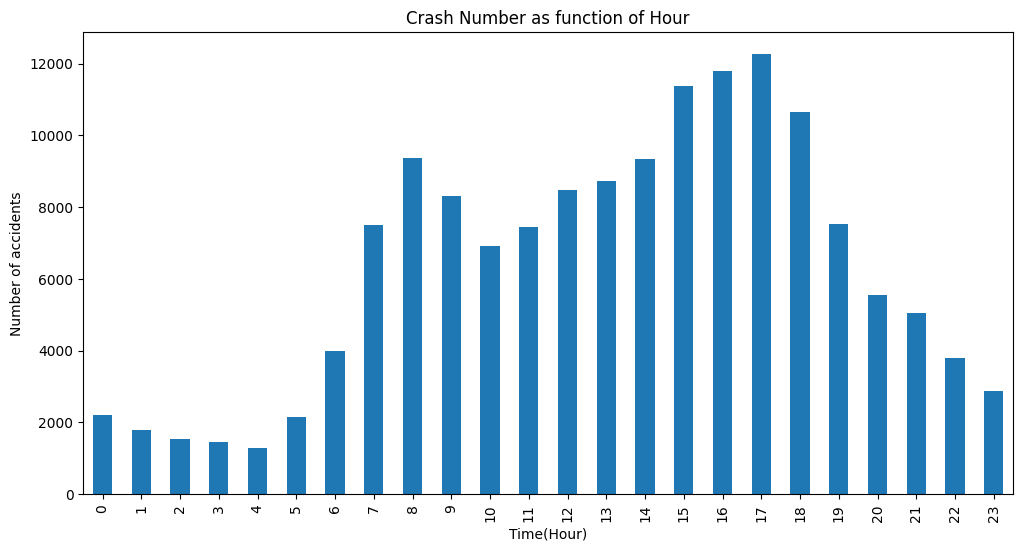

In [ ]:
fig = plt.figure(figsize = (12,6))
ax = fig.gca()
df.groupby(df.index.hour).size().plot.bar(ax=ax)
ax.set_xlabel('Time(Hour)')
ax.set_ylabel('Number of accidents')
ax.set_title('Crash Number as function of Hour')


Text(0.5, 1.0, 'Property Damage Crash')

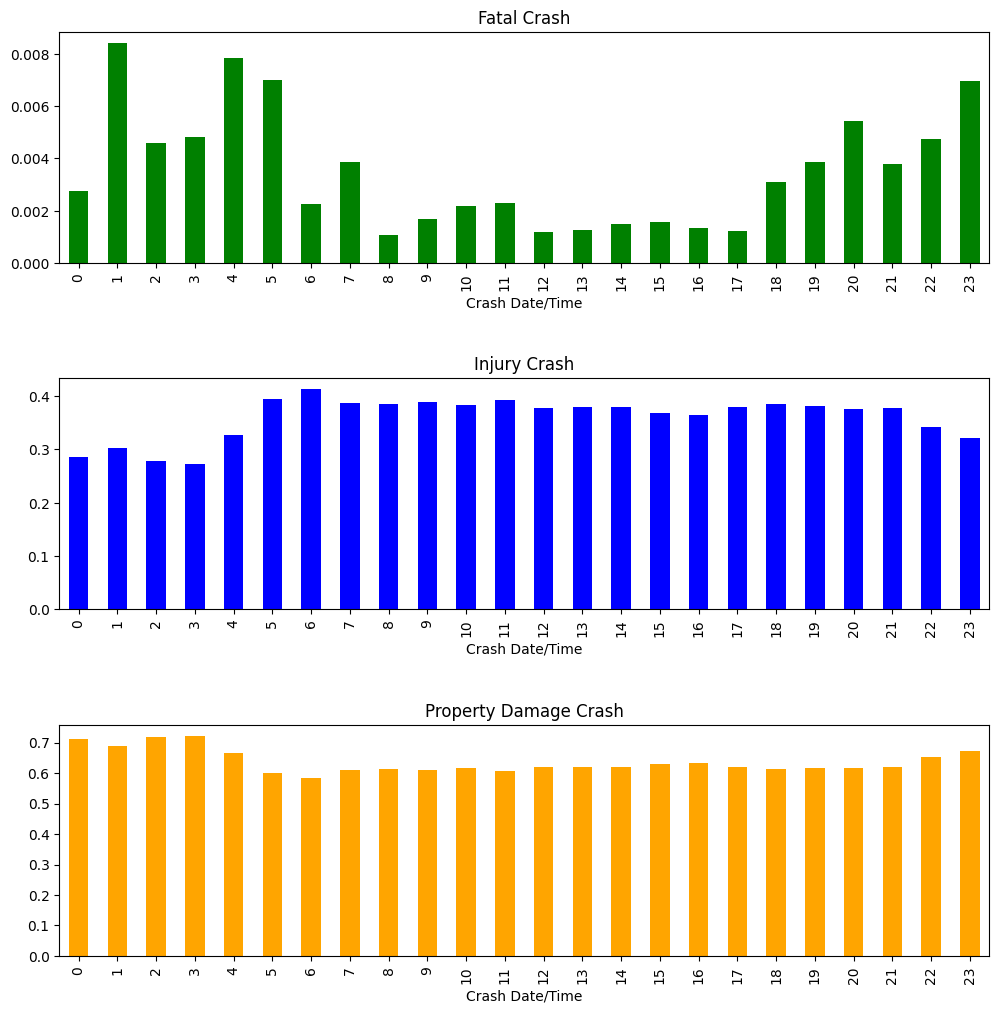

In [ ]:
fig, axes = plt.subplots(nrows=3
                         , ncols=1, figsize = (12,12))
fig.subplots_adjust(hspace=0.5)
crash_time_norm = df.groupby(df.index.hour)["ACRS Report Type"].value_counts(normalize=True).unstack()

crash_time_norm["Fatal Crash"].plot.bar(ax=axes[0],color="g")
axes[0].set_title("Fatal Crash")
crash_time_norm["Injury Crash"].plot.bar(ax=axes[1],color="b")
axes[1].set_title("Injury Crash")
crash_time_norm["Property Damage Crash"].plot.bar(ax=axes[2],color="orange")
axes[2].set_title("Property Damage Crash")

The graphs show the distribution of car crashes by hour of the day and the type of crash result: **fatal**, **property damage**, and **injury**. The y-axis represents the number of crashes(normalized by the total of all cases in this category), while the x-axis represents the hour of the day. The graph reveals that fatal crashes are more likely to occur during the night, while the distribution of property damage and injury crashes appears to be uniform across the 24-hour period

In [ ]:


df["Vehicle Year"].value_counts()

2015    10537
2014    10383
2016     9818
2013     9798
2012     8378
        ...  
1025        1
2998        1
3013        1
2040        1
2919        1
Name: Vehicle Year, Length: 130, dtype: int64

In [ ]:
df[(df["Vehicle Year"].astype(int) < 2016) & (df["Vehicle Year"] > 1990)].groupby("Vehicle Year").size()

Vehicle Year
1991      139
1992      187
1993      290
1994      414
1995      589
1996      767
1997     1203
1998     1536
1999     2043
2000     3057
2001     3273
2002     3988
2003     4984
2004     5684
2005     6025
2006     6860
2007     7288
2008     7191
2009     6157
2010     6696
2011     7601
2012     8378
2013     9798
2014    10383
2015    10537
dtype: int64

ACRS Report Type,Fatal Crash,Injury Crash,Property Damage Crash
Vehicle Year,,,
1997,0.005819,0.373234,0.620948
1998,0.001953,0.397135,0.600911
1999,0.002447,0.407734,0.589819
2000,0.002290,0.376186,0.621524
2001,0.001222,0.386496,0.612282
2002,0.003260,0.399950,0.596790
2003,0.003010,0.400281,0.596709
2004,0.003519,0.413441,0.583040
2005,0.003154,0.382075,0.614772


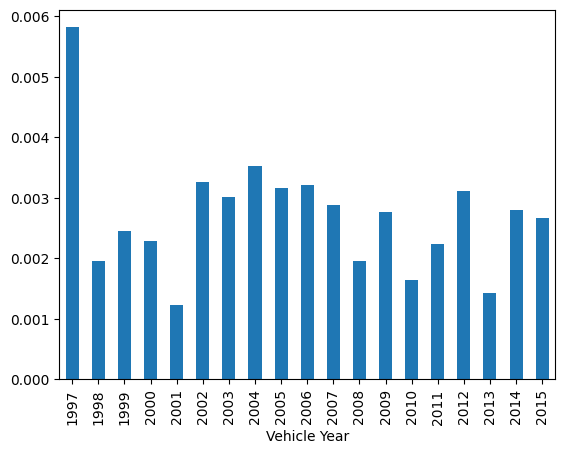

In [ ]:
vehical_year = df[(df["Vehicle Year"].astype(int) < 2016) & (df["Vehicle Year"] > 1996)].groupby("Vehicle Year")["ACRS Report Type"].value_counts(normalize=True).unstack().fillna(0)
vehical_year["Fatal Crash"].plot.bar()
# vehical_year["Injury Crash"].plot.bar()
vehical_year

In [ ]:
vehical_year = df[(df["Vehicle Year"].astype(int) < 2016) & (df["Vehicle Year"] > 1996)].groupby(["Vehicle Year","Weather"])["ACRS Report Type"].value_counts(normalize=False).unstack().fillna(0)
vehical_year

ACRS Report Type           Fatal Crash  Injury Crash  Property Damage Crash
Vehicle Year Weather                                                       
1997         BLOWING SNOW          0.0           1.0                    1.0
             CLEAR                 6.0         278.0                  520.0
             CLOUDY                0.0          51.0                   71.0
             FOGGY                 0.0           0.0                    3.0
             OTHER                 0.0           1.0                    1.0
...                                ...           ...                    ...
2015         SEVERE WINDS          0.0           4.0                   11.0
             SLEET                 0.0           8.0                    9.0
             SNOW                  0.0          27.0                   43.0
             UNKNOWN               0.0           4.0                   33.0
             WINTRY MIX            0.0           3.0                   12.0

[219 rows x 3 columns]

In [ ]:
df["Weather"].value_counts()

CLEAR                       102217
RAINING                      18646
CLOUDY                       15562
SNOW                          1420
FOGGY                          610
UNKNOWN                        493
WINTRY MIX                     382
OTHER                          337
SLEET                          208
SEVERE WINDS                   151
BLOWING SNOW                   112
BLOWING SAND, SOIL, DIRT        15
Name: Weather, dtype: int64

In [ ]:
df["Injury Severity"].value_counts()

NO APPARENT INJURY          123165
POSSIBLE INJURY              15858
SUSPECTED MINOR INJURY       10858
SUSPECTED SERIOUS INJURY      1272
FATAL INJURY                   140
Name: Injury Severity, dtype: int64

In [ ]:
df["ACRS Report Type"].value_counts()

Property Damage Crash    94335
Injury Crash             56571
Fatal Crash                387
Name: ACRS Report Type, dtype: int64

In [ ]:
df["Vehicle Body Type"].value_counts()

PASSENGER CAR                                                105326
(SPORT) UTILITY VEHICLE                                       14029
PICKUP TRUCK                                                   5981
VAN                                                            4372
TRANSIT BUS                                                    3249
SCHOOL BUS                                                     2459
POLICE VEHICLE/NON EMERGENCY                                   1759
OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)               1730
CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))      1631
OTHER                                                          1408
MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))         1304
POLICE VEHICLE/EMERGENCY                                       1303
UNKNOWN                                                         819
MOTORCYCLE                                                      791
STATION WAGON                                   